In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/optimized_dataset.csv")
data.head()


,Weekly_Sales_Log_Standardized,CPI_Log_Standardized,Store_Standardized,Dept_Standardized,Temperature_Standardized,Fuel_Price_Standardized,MarkDown1_Standardized,MarkDown4_Standardized
0,0.877474,1.020494,-1.950537,-1.913804,-1.000331,-1.653971,-0.740193,-0.679922
1,1.362127,1.023284,-1.950537,-1.913804,-1.192331,-1.653971,-0.740193,-0.679922
2,1.278926,1.024182,-1.950537,-1.913804,-1.121142,-1.653971,-0.740193,-0.679922
3,0.692145,1.024765,-1.950537,-1.913804,-0.776476,-1.653971,-0.740193,-0.679922
4,0.778401,1.025348,-1.950537,-1.913804,-0.783295,-1.576265,-0.740193,-0.679922


In [4]:
# Assuming 'Weekly_Sales' as the target variable
X = data.drop('Weekly_Sales_Log_Standardized', axis=1)  # Özellikler
y = data['Weekly_Sales_Log_Standardized']  # Hedef değişken


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Modeli derleyin
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10540/10540 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.9010 - val_loss: 0.7324
Epoch 2/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.7347 - val_loss: 0.6596
Epoch 3/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.6734 - val_loss: 0.6093
Epoch 4/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.6200 - val_loss: 0.5292
Epoch 5/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.5686 - val_loss: 0.4823
Epoch 6/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.5269 - val_loss: 0.4438
Epoch 7/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.4958 - val_loss: 0.4573
Epoch 8/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.4712 - val_loss: 0.4084
Epoch 9/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.4488 - val_loss: 0.3968
Epoch 10/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.4313 - val_loss: 0.3727
Epoch 11/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.4150 - val_loss: 0.3644
Epoch 12

In [7]:
# Test verisiyle tahmin yapın
y_pred = model.predict(X_test)

# Performans metrikleri
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Mean Absolute Error: 0.3965346102219631
Mean Squared Error: 0.3090677715719639
R-squared: 0.6902611097705207


# Model Development for Weekly Sales Forecasting

## Step 1: Import Libraries
In this step, we import all necessary libraries for data manipulation, model building, and evaluation.

## Step 2: Load and Inspect the Dataset
We load the optimized dataset that has been preprocessed in previous steps.

## Step 3: Feature and Target Separation
Separate the target variable (Weekly Sales) from the input features.

## Step 4: Train-Test Split
Split the data into training and testing sets to evaluate model performance later.

## Step 5: Model Building and Training
Build an LSTM model for time series forecasting and train it with the training data.

## Step 6: Model Evaluation
Evaluate the model’s performance on the test set using metrics like MAE, MSE, and R-squared.


In [8]:
original_data = pd.read_csv("C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/test.csv", parse_dates=["Date"])
data = data.merge(original_data[['Date']], left_index=True, right_index=True)


In [9]:
data['Date'] = pd.to_datetime(data['Date'])



In [10]:
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek



Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


En İyi LSTM Parametreleri:  {'model__units': 32, 'model__optimizer': 'adam', 'model__dropout_rate': 0.1, 'batch_size': 32}
LSTM Model Performansı
Ortalama Mutlak Hata (MAE): 0.5679653289115646
Ortalama Kare Hata (MSE): 0.5336507719528726
R-Karesi: 0.4651904433966494

Random Forest Model Performansı
Ortalama Mutlak Hata (MAE): 0.33766287753190016
Ortalama Kare Hata (MSE): 0.21778249065871627
R-Karesi: 0.7817446101709242


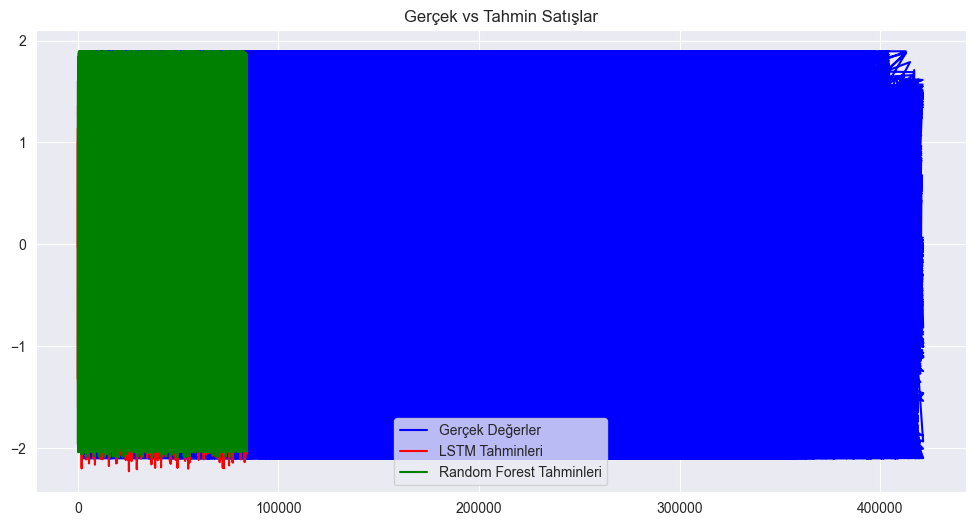

In [18]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# LSTM modeli oluşturma fonksiyonu, parametrelerle daha geniş bir model yapılandırması sağlanıyor
def create_model(units=32, dropout_rate=0.1, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# KerasRegressor ile LSTM modelini sarmalıyoruz ve EarlyStopping ile eğitim sürecini durdurma koşulu ekliyoruz
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0,
                       callbacks=[EarlyStopping(monitor='loss', patience=2)])

# Hiperparametre aralığını daha daraltılmış şekilde tanımlıyoruz
param_grid = {
    'model__units': [16, 32],
    'model__dropout_rate': [0.1],
    'model__optimizer': ['adam'],
    'batch_size': [32]
}

# Hızlı arama için RandomizedSearchCV kullanarak LSTM modelinde en iyi parametreleri buluyoruz
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_iter=2, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En İyi LSTM Parametreleri: ", grid_result.best_params_)

# En iyi LSTM modelini kullanarak tahmin yapıyoruz
y_pred_lstm = grid_result.best_estimator_.predict(X_test)

# LSTM Model Performans Metriği
print("LSTM Model Performansı")
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y_test, y_pred_lstm))
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, y_pred_lstm))
print("R-Karesi:", r2_score(y_test, y_pred_lstm))

# RandomForest modelini oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# RandomForest modeli ile tahmin yap
y_pred_rf = rf_model.predict(X_test)

# RandomForest Model Performans Metriği
print("\nRandom Forest Model Performansı")
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-Karesi:", r2_score(y_test, y_pred_rf))

# Model tahminlerini görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Gerçek Değerler')
plt.plot(y_pred_lstm, color='red', label='LSTM Tahminleri')
plt.plot(y_pred_rf, color='green', label='Random Forest Tahminleri')
plt.title("Gerçek vs Tahmin Satışlar")
plt.legend()
plt.show()



In [ ]:
import joblib

# RandomForest modelini kaydet
joblib.dump(rf_model, "random_forest_model.pkl")

# Optimizasyon yapılmış veri setini kaydet
optimized_features.to_csv('final_optimized_dataset.csv', index=False)
print("Models and dataset saved.")
